# Detecting Building defects using  VGG16

### Importing necessary libraries

In [86]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


### Image Data Agumentation¶

In [87]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#performing data agumentation on train data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#performing data agumentation on test data
test_datagen = ImageDataGenerator(rescale = 1./255)

### Loading our data and performing data agumentation

In [88]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('../data/train_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 316 images belonging to 3 classes.


In [89]:
test_set = test_datagen.flow_from_directory('../data/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 3 classes.


In [90]:
print(training_set.class_indices)#checking the number of classes

{'crack': 0, 'flakes': 1, 'roof': 2}


In [91]:
from collections import Counter as c
c(training_set .labels)

Counter({0: 86, 1: 176, 2: 54})

## Model Building

In [92]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data/train_set'
valid_path = 'data/test_set'


In [93]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [94]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [95]:
  # useful for getting number of output classes
folders = glob('../data/train_set/*')

In [96]:
folders

['../data/train_set\\crack',
 '../data/train_set\\flakes',
 '../data/train_set\\roof']

In [97]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [98]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [99]:

# view the structure of the model
model.summary()


Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

### Compiling the model

In [100]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


### Fit the model

In [60]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
10/10 [==============================] - 239s 24s/step - loss: 0.8809 - accuracy: 0.6076 - val_loss: 0.6249 - val_accuracy: 0.7833
Epoch 2/10
10/10 [==============================] - 244s 24s/step - loss: 0.4475 - accuracy: 0.8070 - val_loss: 0.6764 - val_accuracy: 0.7750
Epoch 3/10
10/10 [==============================] - 212s 21s/step - loss: 0.3082 - accuracy: 0.8987 - val_loss: 0.5917 - val_accuracy: 0.7833
Epoch 4/10
10/10 [==============================] - 190s 19s/step - loss: 0.2729 - accuracy: 0.8924 - val_loss: 0.5513 - val_accuracy: 0.7667
Epoch 5/10
10/10 [==============================] - 189s 19s/step - loss: 0.2103 - accuracy: 0.9304 - val_loss: 0.7796 - val_accuracy: 0.7917
Epoch 6/10
10/10 [==============================] - 192s 19s/step - loss: 0.1487 - accuracy: 0.9557 - val_loss: 0.5223 - val_accuracy: 0.8000
Epoch 7/10
10/10 [==============================] - 190s 19s/step - loss: 0.1378 - accuracy: 0.9715 - val_loss: 0.5939 - val_accuracy: 0.8000
Epoch 

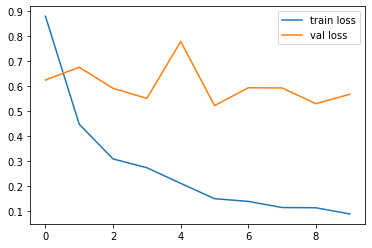

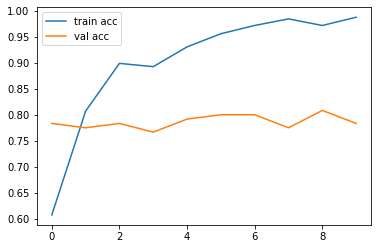

<Figure size 432x288 with 0 Axes>

In [61]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Saving our model

In [62]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_building_defects_vgg16.h5')

### Predicitng our results

In [101]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
model = load_model("model_building_defects_vgg16.h5") #loading the model for testing

In [102]:
img=image.load_img(r'D:\ML_training may 2020\Projects_50\Final\Detecting_building_defects\data\test_set\flakes\38.jpg',target_size=(224,224))
x=image.img_to_array(img)
#x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
#model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)


In [103]:
a

array([1], dtype=int64)

In [104]:
index=['crack','flakes','roof']
result=str(index[a[0]])
result

'flakes'

In [105]:
!pip install jupyterthemes as jt

ERROR: Could not find a version that satisfies the requirement jt (from versions: none)
ERROR: No matching distribution found for jt



  Using cached as-0.1-py3-none-any.whl (2.2 kB)


In [106]:
!jt -t monokai

In [107]:
!jt -r

Reset css and font defaults in:
C:\Users\Tulasi\.jupyter\custom &
C:\Users\Tulasi\AppData\Roaming\jupyter\nbextensions
